In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from pathlib import Path

folder_list = []
train_dir = Path('../train')

for folder in train_dir.iterdir():
    folder_list.append(folder)
folder_list


# dfs = []
# for folder in folder_list:
#     if folder.is_dir():
#         file_1 = folder/'annotations_0.csv'
#         file_2 = folder/'annotations_1.csv'
#         if file_1.exists():
#             print(file_1)
#             df = pd.read_csv(file_1)
#             dfs.append(df)
#         if file_2.exists():
#             print(file_2)
#             df = pd.read_csv(file_2)
#             dfs.append(df)

# df_co = pd.concat(dfs, ignore_index=True)
# df_co.to_csv('combined_annotations.csv', index=False)

[WindowsPath('../train/00001'),
 WindowsPath('../train/00002'),
 WindowsPath('../train/00003'),
 WindowsPath('../train/00004'),
 WindowsPath('../train/00005'),
 WindowsPath('../train/00006'),
 WindowsPath('../train/00007'),
 WindowsPath('../train/00008'),
 WindowsPath('../train/00009'),
 WindowsPath('../train/00010')]

In [4]:
acc_files = []
pir_clean_files = []
targets_files = []

for folder in folder_list:
    if folder.is_dir():
        acc_files.append(folder/'acceleration.csv')
        pir_clean_files.append(folder/'pir_clean_filled.csv')
        targets_files.append(folder/'targets.csv')

In [5]:
anno_0_files = []
anno_1_files = []

for folder in folder_list:
    if folder.is_dir():
        anno_0_files.append(folder/'annotations_0.csv')
        anno_1_files.append(folder/'annotations_1.csv')

In [6]:
from collections import Counter

for i in range(len(folder_list)):
    targets = pd.read_csv(targets_files[i])
    anno = pd.DataFrame()

    if anno_0_files[i].exists() and not anno_1_files[i].exists():
        anno0 = pd.read_csv(anno_0_files[i])

        for _, row in targets.iterrows():
            start, end = row['start'], row['end']
            segments = anno0[(anno0['end'] >= start) & (anno0['start'] <= end)][['name', 'index']].values
    
            if segments.size == 0:
                anno = anno._append(
                    {
                        'start': start,
                        'end': end,
                        'name': None,
                        'index': None
                    }, ignore_index=True)
                continue

            segments = segments[0]


            feature = {
                'start': start, 
                'end': end,
                'name': segments[0],
                'index': segments[1]
            }

            anno = anno._append(feature, ignore_index=True)
        anno.to_csv(folder_list[i]/'annotations.csv', index=False)

    elif anno_0_files[i].exists() and anno_1_files[i].exists():
        anno0 = pd.read_csv(anno_0_files[i])
        anno1 = pd.read_csv(anno_1_files[i])

        anno_combine = pd.concat([anno0, anno1]).sort_values(by='start')

        for _, row in targets.iterrows():
            start, end = row['start'], row['end']
            segments = anno_combine[(anno_combine['end'] >= start) & (anno_combine['start'] <= end)][['name', 'index']].values

            if segments.size == 0:
                anno = anno._append(
                    {
                        'start': start,
                        'end': end,
                        'name': None,
                        'index': None
                    }, ignore_index=True)
                continue

            seg_tuples = [tuple(item) for item in segments]
            counts = Counter(seg_tuples)
            keep_ele = counts.most_common(1)[0][0]

            feature = {
                'start': start,
                'end': end,
                'name': keep_ele[0],
                'index': keep_ele[1]
            }

            anno = anno._append(feature, ignore_index=True)
        anno.to_csv(folder_list[i]/'annotations.csv', index=False)

In [7]:
annos = []
for folder in folder_list:
    if folder.is_dir():
        file = folder/'annotations.csv'
        df = pd.read_csv(file) 
        annos.append(df)

anno_co = pd.concat(annos, ignore_index=True)
anno_co.to_csv('combined_annotations.csv', index=False)

Training set activity classes distrubution

In [8]:
status = pd.read_csv('combined_annotations.csv')

df_sorted = status.sort_values(by='index')

df_gph = pd.DataFrame()
df_gph['name'] = df_sorted['name'].unique()
df_gph = df_gph.drop(20)

activity_counts_sorted = df_sorted['name'].value_counts()
df_gph['frequency'] = activity_counts_sorted.values
# # print(type(activity_counts_sorted))
df_gph['frequency'] = df_gph['name'].map(activity_counts_sorted)
# df_gph['frequency'] = df_gph['frequency'].astype(int)

# df_gph = df_gph.drop(20)

df_gph


,name,frequency
0,a_ascend,123
1,a_descend,122
2,a_jump,42
3,a_loadwalk,120
4,a_walk,1693
5,p_bent,684
6,p_kneel,211
7,p_lie,1385
8,p_sit,3072
9,p_squat,137


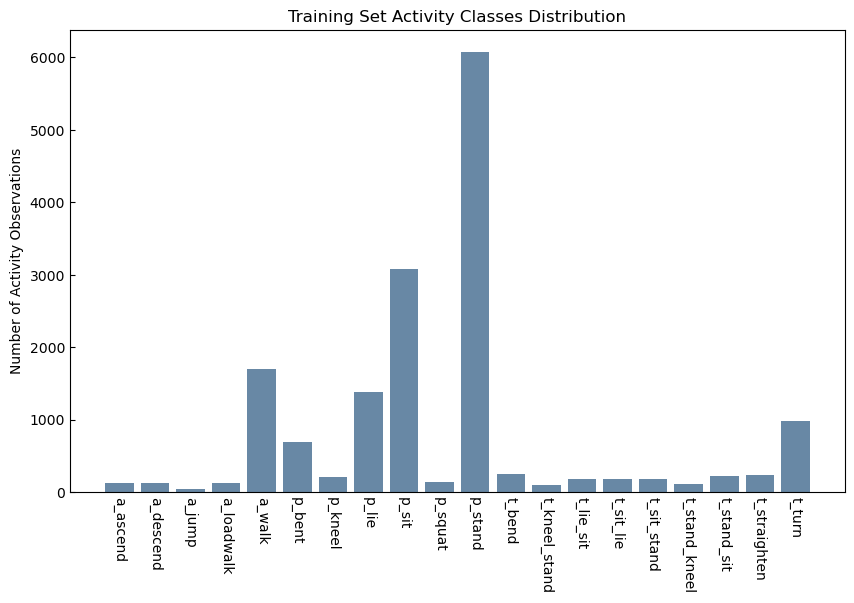

In [9]:

plt.figure(figsize=(10,6))
plt.bar(df_gph['name'], df_gph['frequency'], color='#6888a5')
plt.title('Training Set Activity Classes Distribution')
plt.ylabel('Number of Activity Observations')
plt.xticks(rotation=270, ha="center")  
plt.tick_params( axis='both',         
    which='both',        
    direction='in',
    bottom=False)
plt.show()

In [10]:
locs = []
for folder in folder_list:
    if folder.is_dir():
        file = folder/'location.csv'
        df = pd.read_csv(file) 
        locs.append(df)

loc_co = pd.concat(locs, ignore_index=True)
loc_co.to_csv('combined_location.csv', index=False)

In [11]:
loc_status = pd.read_csv('combined_location.csv',)
loc_status = pd.concat([status[['start', 'end', 'name', 'index']], loc_status[['name', 'index']]], axis=1)
loc_status.columns = ['start', 'end', 'status_name', 'status_index', 'loc_name', 'loc_index']

loc_status

,start,end,status_name,status_index,loc_name,loc_index
0,46.0,47.0,a_walk,4.0,hall,3.0
1,47.0,48.0,a_walk,4.0,hall,3.0
2,48.0,49.0,a_walk,4.0,living,5.0
3,49.0,50.0,a_walk,4.0,living,5.0
4,50.0,51.0,p_stand,10.0,living,5.0
...,...,...,...,...,...,...
16118,1787.0,1788.0,p_stand,10.0,study,7.0
16119,1788.0,1789.0,p_stand,10.0,study,7.0
16120,1789.0,1790.0,p_stand,10.0,study,7.0
16121,1790.0,1791.0,p_stand,10.0,study,7.0


In [12]:
cross_tab = pd.crosstab(loc_status['loc_name'], loc_status['status_name'])
cross_tab

status_name,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
loc_name,,,,,,,,,,,,,,,,,,,,
bath,0,1,0,0,148,197,0,0,0,0,970,38,0,0,0,0,0,0,44,62
bed1,0,0,0,0,134,0,0,0,0,0,136,0,0,0,0,0,0,0,0,43
bed2,0,0,0,0,119,153,103,711,403,102,932,64,50,85,85,69,54,72,58,170
hall,14,34,0,39,186,0,0,0,0,0,91,0,0,0,0,0,0,0,0,14
kitchen,24,23,0,58,437,99,0,0,0,0,2260,46,0,0,0,0,0,0,49,315
living,0,0,42,23,380,219,108,674,2520,35,1219,98,47,98,100,102,51,129,84,277
stairs,85,64,0,0,205,0,0,0,0,0,99,0,0,0,0,0,0,0,0,42
study,0,0,0,0,17,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0
toilet,0,0,0,0,64,16,0,0,149,0,295,6,0,0,0,12,0,18,3,61


In [13]:
cross_tab_reset = cross_tab.reset_index()

# 使用melt将宽格式数据转换为长格式
melted = cross_tab_reset.melt(id_vars=['loc_name'], value_name='frequency').rename(columns={'variable': 'status_name'})
melted.to_csv('melted.csv')
